In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [21]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
combined_data = pd.concat([sheet1, sheet2], ignore_index = True)
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
combined_data = combined_data.drop_duplicates()
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [23]:
data_cleaned = combined_data.dropna(subset = ['Customer ID'])
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [24]:
data_cleaned['Description'].fillna('Unknown')
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [25]:
data_cleaned = data_cleaned.reset_index(drop = True)
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [26]:
data_cleaned = data_cleaned[(data_cleaned['Quantity'] >= 0) & (data_cleaned['Price'] >= 0)]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [27]:
data_cleaned = data_cleaned[(data_cleaned['InvoiceDate'] <= '2011-12-09') & (data_cleaned['InvoiceDate'] >= '2009-12-01')]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [28]:
data_cleaned = data_cleaned.copy()
data_cleaned.loc[:, "InvoiceYear"] = data_cleaned["InvoiceDate"].dt.year
data_cleaned.loc[:, "InvoiceMonth"] = data_cleaned["InvoiceDate"].dt.month
data_cleaned.loc[:, "InvoiceDay"] = data_cleaned["InvoiceDate"].dt.day
data_cleaned.loc[:, "InvoiceWeek"] = data_cleaned["InvoiceDate"].dt.isocalendar().week
data_cleaned.loc[:, "InvoiceWeekday"] = data_cleaned["InvoiceDate"].dt.weekday
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,48,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,48,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,30,48,1
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,30,48,1
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1


In [37]:
data_cleaned = data_cleaned.copy()
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,48,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,48,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1,25.20
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,30,48,1,15.90
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,30,48,1,15.00
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1,50.40


In [39]:
data_cleaned = data_cleaned.copy()

# Convert InvoiceDate to datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Date'] = data_cleaned['InvoiceDate'].dt.date
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour

data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue,Date,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,48,2,15.30,2010-12-01,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34,2010-12-01,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,48,2,22.00,2010-12-01,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34,2010-12-01,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,48,2,20.34,2010-12-01,2010-12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1,25.20,2010-11-30,2010-11,19
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,30,48,1,15.90,2010-11-30,2010-11,19
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,30,48,1,15.00,2010-11-30,2010-11,19
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,30,48,1,50.40,2010-11-30,2010-11,19


In [43]:
new_df = data_cleaned[["Invoice","StockCode","Description","Quantity","Price","Customer ID","InvoiceYear","InvoiceMonth","InvoiceDay","InvoiceWeek","InvoiceWeekday","Revenue","Date","Hour"]]
new_df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeek,InvoiceWeekday,Revenue,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,2010,12,1,48,2,15.30,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,2010,12,1,48,2,20.34,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,2010,12,1,48,2,22.00,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,2010,12,1,48,2,20.34,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,2010,12,1,48,2,20.34,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2.10,14441.0,2010,11,30,48,1,25.20,2010-11-30,19
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,7.95,14441.0,2010,11,30,48,1,15.90,2010-11-30,19
797882,536364,21098,CHRISTMAS TOILET ROLL,12,1.25,14441.0,2010,11,30,48,1,15.00,2010-11-30,19
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2.10,14441.0,2010,11,30,48,1,50.40,2010-11-30,19


In [45]:
daily_data = new_df.groupby(['Date', 'StockCode']).agg({
    'Quantity': 'sum',
}).reset_index()

daily_data

,Date,StockCode,Quantity
0,2009-12-01,10002,12
1,2009-12-01,10120,60
2,2009-12-01,10125,4
3,2009-12-01,10133,6
4,2009-12-01,10135,17
...,...,...,...
438727,2011-12-08,90214P,13
438728,2011-12-08,90214R,1
438729,2011-12-08,90214S,12
438730,2011-12-08,M,3


In [49]:
# Convert Date to datetime and sort the data
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.sort_values(by='Date', inplace=True)
daily_data

,Date,StockCode,Quantity
0,2009-12-01,10002,12
687,2009-12-01,82567,3
688,2009-12-01,82578,1
689,2009-12-01,82580,13
690,2009-12-01,82581,1
...,...,...,...
437966,2011-12-08,22402,2
437965,2011-12-08,22398,50
437964,2011-12-08,22395,48
437970,2011-12-08,22411,37


In [51]:
# Filter data for a specific StockCode
stockcode = 22423
data = daily_data[daily_data['StockCode'] == stockcode]
data

,Date,StockCode,Quantity
53926,2010-03-15,22423,8
54586,2010-03-16,22423,39
55296,2010-03-17,22423,21
56020,2010-03-18,22423,21
56650,2010-03-19,22423,61
...,...,...,...
433326,2011-12-04,22423,10
434496,2011-12-05,22423,33
435846,2011-12-06,22423,146
436904,2011-12-07,22423,130


In [53]:
# Prepare features and target
data.set_index('Date', inplace=True)
data = data[['Quantity']]  # Keep only the Quantity column
data

,Quantity
Date,
2010-03-15,8
2010-03-16,39
2010-03-17,21
2010-03-18,21
2010-03-19,61
...,...
2011-12-04,10
2011-12-05,33
2011-12-06,146


In [55]:
# Create lag features and rolling statistics
for lag in range(1, 8):  # Lag features for the past 7 days
    data[f'lag_{lag}'] = data['Quantity'].shift(lag)

data['rolling_mean_7'] = data['Quantity'].rolling(window=7).mean()
data['rolling_std_7'] = data['Quantity'].rolling(window=7).std()
data

,Quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7
Date,,,,,,,,,,
2010-03-15,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-16,39,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-17,21,39.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-18,21,21.0,39.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-19,61,21.0,21.0,39.0,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2011-12-04,10,15.0,32.0,29.0,82.0,33.0,23.0,12.0,32.000000,23.678401
2011-12-05,33,10.0,15.0,32.0,29.0,82.0,33.0,23.0,33.428571,23.344215
2011-12-06,146,33.0,10.0,15.0,32.0,29.0,82.0,33.0,49.571429,48.507241


In [57]:
# Replace NaN values with 0 instead of dropping them
data.fillna(0, inplace=True)
data

,Quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7
Date,,,,,,,,,,
2010-03-15,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-16,39,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-17,21,39.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-18,21,21.0,39.0,8.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-19,61,21.0,21.0,39.0,8.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2011-12-04,10,15.0,32.0,29.0,82.0,33.0,23.0,12.0,32.000000,23.678401
2011-12-05,33,10.0,15.0,32.0,29.0,82.0,33.0,23.0,33.428571,23.344215
2011-12-06,146,33.0,10.0,15.0,32.0,29.0,82.0,33.0,49.571429,48.507241


In [59]:
# Split into train and test sets (last 30 days for testing)
train = data.iloc[:-30]
test = data.iloc[-30:]

X_train, y_train = train.drop(columns=['Quantity']), train['Quantity']
X_test, y_test = test.drop(columns=['Quantity']), test['Quantity']
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7
Date,,,,,,,,,
2010-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-16,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-17,39.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-18,21.0,39.0,8.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2010-03-19,21.0,21.0,39.0,8.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2011-10-30,52.0,27.0,18.0,12.0,2.0,6.0,25.0,19.428571,16.631868
2011-10-31,19.0,52.0,27.0,18.0,12.0,2.0,6.0,25.142857,18.059426
2011-11-01,46.0,19.0,52.0,27.0,18.0,12.0,2.0,27.857143,15.203383


In [61]:
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_std_7
Date,,,,,,,,,
2011-11-04,65.0,2.0,21.0,46.0,19.0,52.0,27.0,44.428571,34.808319
2011-11-06,106.0,65.0,2.0,21.0,46.0,19.0,52.0,40.571429,35.321651
2011-11-07,25.0,106.0,65.0,2.0,21.0,46.0,19.0,42.857143,34.192731
2011-11-08,35.0,25.0,106.0,65.0,2.0,21.0,46.0,37.285714,36.682031
2011-11-09,7.0,35.0,25.0,106.0,65.0,2.0,21.0,36.285714,37.290366
2011-11-10,14.0,7.0,35.0,25.0,106.0,65.0,2.0,42.571429,34.121631
2011-11-11,46.0,14.0,7.0,35.0,25.0,106.0,65.0,35.285714,33.978985
2011-11-13,14.0,46.0,14.0,7.0,35.0,25.0,106.0,24.285714,13.659115
2011-11-14,29.0,14.0,46.0,14.0,7.0,35.0,25.0,21.571429,15.284602


In [63]:
# Normalize the features
scaler = StandardScaler()  # You can also use MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [65]:
# Set up Random Forest Regressor with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [67]:
# Perform randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='r2',  # Scoring metric
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [69]:
# Fit the model
rf_random.fit(X_train_scaled, y_train)

# Best parameters from tuning
print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}


In [71]:
# Use the best model for predictions
best_rf = rf_random.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.4172
MSE: 786.5097
MAE: 21.4801
RMSE: 28.0448


In [73]:
# Create a DataFrame for actual vs predicted quantities
forecast_table = pd.DataFrame({
    'Date': y_test.index,
    'Actual Quantity': y_test.values,
    'Forecasted Quantity': y_pred
})

# Print the forecast table
print(forecast_table)

         Date  Actual Quantity  Forecasted Quantity
0  2011-11-04              106            36.251052
1  2011-11-06               25            45.817354
2  2011-11-07               35            37.944578
3  2011-11-08                7            28.112855
4  2011-11-09               14            23.266136
5  2011-11-10               46            39.591991
6  2011-11-11               14            39.664466
7  2011-11-13               29            25.280451
8  2011-11-14                6            20.011633
9  2011-11-15               41            24.595299
10 2011-11-16               13            18.281860
11 2011-11-17               47            30.348751
12 2011-11-18               97            52.358712
13 2011-11-20                8            33.446047
14 2011-11-21               50            36.392877
15 2011-11-22               11            29.423548
16 2011-11-23               47            33.095757
17 2011-11-24               79            75.683033
18 2011-11-2

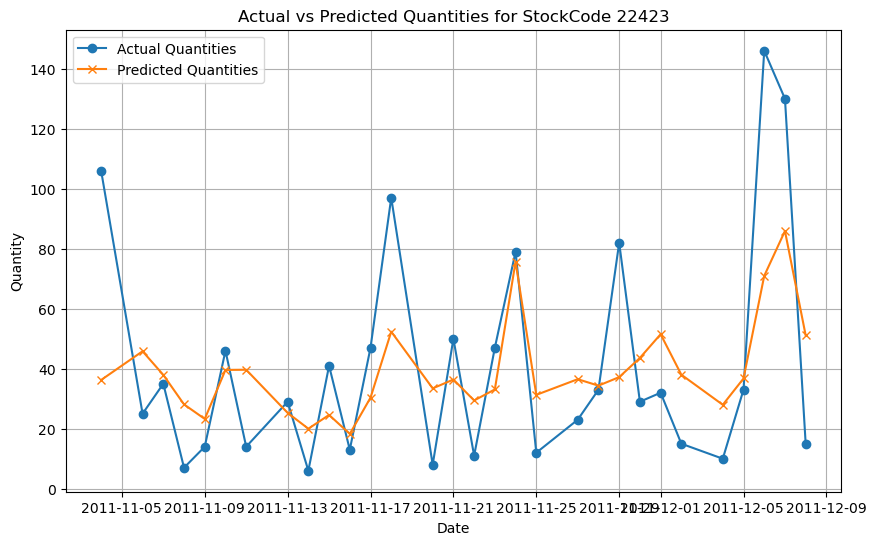

In [75]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Quantities', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Quantities', marker='x')
plt.title(f'Actual vs Predicted Quantities for StockCode {stockcode}')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

# XG Boost

In [79]:
# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [87]:
# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time

In [89]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test_scaled)

In [93]:
# Print metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9}
R² Score: 0.6706
MSE: 444.4986
MAE: 16.4705
RMSE: 21.0831


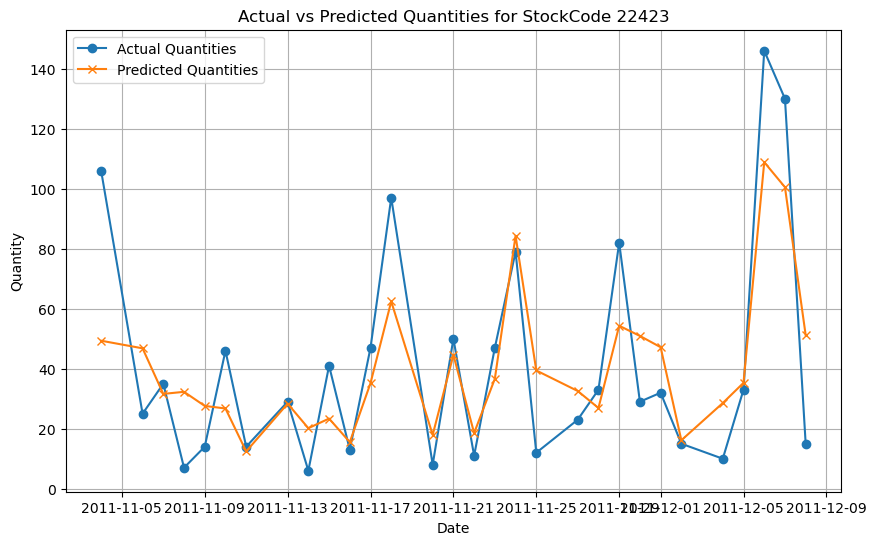

In [95]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Quantities', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Quantities', marker='x')
plt.title(f'Actual vs Predicted Quantities for StockCode {stockcode}')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

In [97]:
y_test.mean()

41.166666666666664